In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [235]:
df=pd.read_csv('uae-housing_dataset.csv')

In [236]:
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name
0,"1,800,000",3 beds,4 baths,"1,208 sqft",UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas
1,"325,000",Studio,1 bath,483 sqft,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas
2,"470,000",Studio,1 bath,428 sqft,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas
3,"1,120,000",1 bed,1 bath,706 sqft,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas
4,"2,127,888",2 beds,2 baths,"1,149 sqft",UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas


In [237]:
df.shape

(5380, 13)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              5380 non-null   object
 1   bedroom            5380 non-null   object
 2   bathroom           5380 non-null   object
 3   area(sqft)         5380 non-null   object
 4   country            5380 non-null   object
 5   city               5380 non-null   object
 6   address            5380 non-null   object
 7   propert_type       5380 non-null   object
 8   purpose            5380 non-null   object
 9   furnishing         5380 non-null   object
 10  completion_status  5380 non-null   object
 11  handover           5380 non-null   object
 12  project_name       5380 non-null   object
dtypes: object(13)
memory usage: 546.5+ KB


In [239]:
df.describe()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name
count,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380
unique,1315,11,12,1601,1,1,119,6,1,2,2,25,868
top,"1,800,000",1 bed,2 baths,792 sqft,UAE,Dubai,Business Bay,Apartment,Sale,Unfurnished,Ready,Q4 2026,The Cosmopolitan (Damac Maison)
freq,70,1811,1739,26,5380,5380,585,4404,5380,3821,2758,723,94


In [240]:
df.isnull().sum()

price                0
bedroom              0
bathroom             0
area(sqft)           0
country              0
city                 0
address              0
propert_type         0
purpose              0
furnishing           0
completion_status    0
handover             0
project_name         0
dtype: int64

# Market Trends and Price Analysis


In [241]:
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name
0,"1,800,000",3 beds,4 baths,"1,208 sqft",UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas
1,"325,000",Studio,1 bath,483 sqft,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas
2,"470,000",Studio,1 bath,428 sqft,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas
3,"1,120,000",1 bed,1 bath,706 sqft,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas
4,"2,127,888",2 beds,2 baths,"1,149 sqft",UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas


In [242]:
df.columns

Index(['price', 'bedroom', 'bathroom', 'area(sqft)', 'country', 'city',
       'address', 'propert_type', 'purpose', 'furnishing', 'completion_status',
       'handover', 'project_name'],
      dtype='object')

In [243]:
#What is the average property price per square foot for dubai?
df['price'] = df['price'].str.replace(',', '').astype(float)

In [244]:
df['area(sqft)'] = df['area(sqft)'].str.replace(',', '').str.replace(' sqft', '').astype(float)

In [245]:
df['price_per_sqft']=df['price']/df['area(sqft)']

In [246]:
df.groupby('city')['price_per_sqft'].mean().round(2)

city
Dubai    2002.1
Name: price_per_sqft, dtype: float64

means avg price per sqft is around 2002 AED

In [247]:
#How do property prices vary by property type (Apartment vs. Villa vs. Townhouse)?
df['propert_type'].value_counts()

propert_type
Apartment               4404
Villa                    584
Townhouse                364
Penthouse                 23
Residential Building       3
Villa Compound             2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Townhouse'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Villa'),
  Text(3, 0, 'Penthouse'),
  Text(4, 0, 'Villa Compound'),
  Text(5, 0, 'Residential Building')])

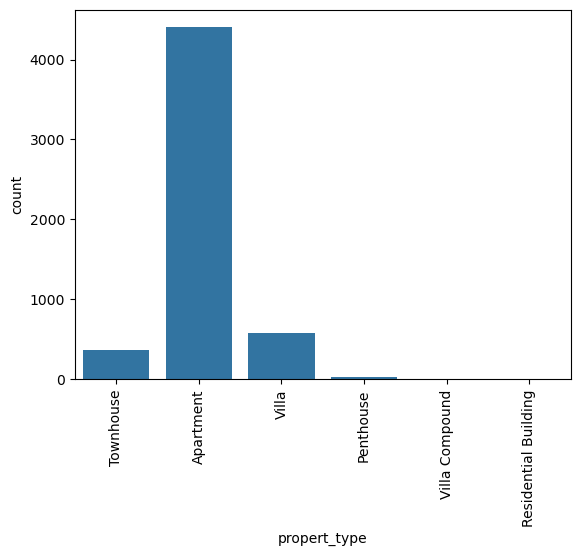

In [248]:
sns.countplot(data=df,x='propert_type')
plt.xticks(rotation=90)

clearly we can see in dubai most of the projects are for apartments followed by townhouse then by villa

In [249]:
#What are the top 5 most expensive and least expensive neighborhoods/addresses in terms of price per sqft?
df['address'].unique()

array([' DAMAC Hills 2 (Akoya by DAMAC)', ' International City', ' Arjan',
       ' Dubai South', ' Jumeirah Village Circle (JVC)', ' Business Bay',
       ' Dubai Islands', ' Dubai Investment Park (DIP)',
       ' Sobha Hartland', ' Al Jaddaf', ' Dubai Land Residence Complex',
       ' Majan', ' Discovery Gardens', ' Dubai Sports City',
       ' Jumeirah Village Triangle (JVT)',
       ' Culture Village (Jaddaf Waterfront)', ' Dubai Hills Estate',
       ' Town Square', ' Jumeirah Beach Residence (JBR)', ' Expo City',
       ' DAMAC Lagoons', ' Green Community', ' Ras Al Khor',
       ' Umm Suqeim', ' Tilal Al Ghaf', ' Al Furjan', ' Dubailand',
       ' Dubai Science Park', ' Downtown Dubai', ' Remraam',
       ' Dubai Silicon Oasis (DSO)', ' Al Barari', ' Al Barsha',
       ' The Valley by Emaar', ' Dubai Creek Harbour', ' Dubai Harbour',
       ' Mina Rashid', ' The Oasis by Emaar', ' Palm Jebel Ali',
       ' Dubai Production City (IMPZ)', ' Al Wasl', ' Dubai Marina',
       ' Al S

In [250]:
df['address'].replace({' Palm Jumeirah':'Palm Jumeirah'},inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21380\2488070745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['address'].replace({' Palm Jumeirah':'Palm Jumeirah'},inplace=True)


In [251]:
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name,price_per_sqft
0,1800000.0,3 beds,4 baths,1208.0,UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas,1490.066225
1,325000.0,Studio,1 bath,483.0,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas,672.877847
2,470000.0,Studio,1 bath,428.0,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas,1098.130841
3,1120000.0,1 bed,1 bath,706.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1586.402266
4,2127888.0,2 beds,2 baths,1149.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1851.947781


In [252]:
top_5_locations=df.groupby('address')['price_per_sqft'].mean().sort_values(ascending=False).head(5)
print(top_5_locations)

address
 Sheikh Zayed Road    10957.692308
 Bluewaters Island     5233.772242
Palm Jumeirah          4721.110343
 The World Islands     4509.075910
 Dubai Harbour         4312.650366
Name: price_per_sqft, dtype: float64


Text(0, 0.5, 'avg price/sqft')

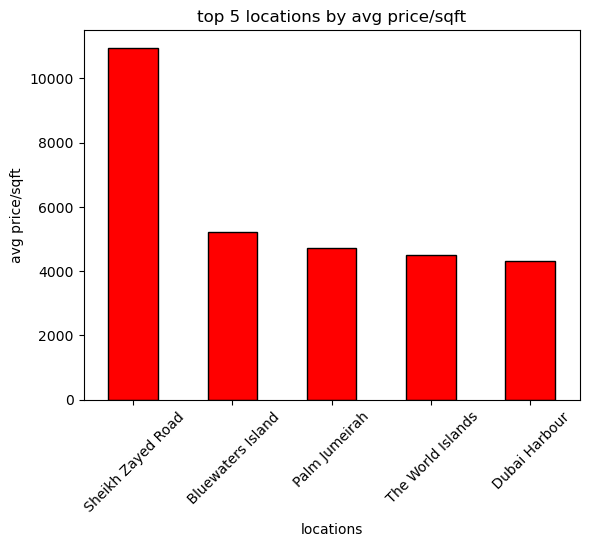

In [253]:
top_5_locations.plot(kind='bar',color='red',edgecolor='black')
plt.xticks(rotation=45)
plt.title('top 5 locations by avg price/sqft')
plt.xlabel('locations')
plt.ylabel('avg price/sqft')

In [254]:
df['address'].replace({
    ' Remraam':'Remraam'
},inplace=True)

In [255]:
Least_expensive_locations=df.groupby('address')['price_per_sqft'].mean().sort_values().head(5)
print(Least_expensive_locations)

address
 Nad Al Hamar          714.285714
 International City    865.037508
Remraam                877.849804
 Al Quoz               934.328296
 Discovery Gardens     971.160443
Name: price_per_sqft, dtype: float64


Text(0, 0.5, 'avg price/sqft')

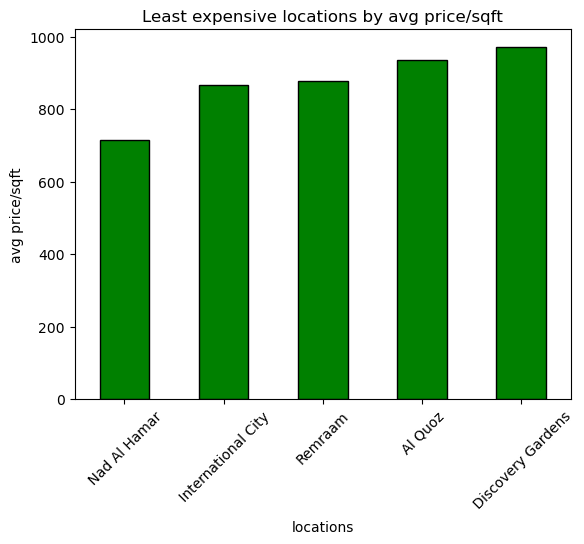

In [256]:
Least_expensive_locations.plot(kind='bar',color='green',edgecolor='black')
plt.xticks(rotation=45)
plt.title('Least expensive locations by avg price/sqft')
plt.xlabel('locations')
plt.ylabel('avg price/sqft')

In [257]:
#What is the price distribution for off-plan vs. ready properties? Are off-plan properties significantly cheaper
df.groupby('completion_status')['price'].mean().round(2)

completion_status
Off-Plan    3604148.73
Ready       3632558.98
Name: price, dtype: float64

means off-plan properties are cheaper then that of ready i.e around (28,410) AED

In [258]:
df[['quater','year']]=df['handover'].str.split(' ',expand=True)

In [259]:
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name,price_per_sqft,quater,year
0,1800000.0,3 beds,4 baths,1208.0,UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas,1490.066225,Q2,2025
1,325000.0,Studio,1 bath,483.0,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas,672.877847,Q2,2025
2,470000.0,Studio,1 bath,428.0,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas,1098.130841,Q2,2025
3,1120000.0,1 bed,1 bath,706.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1586.402266,Q3,2029
4,2127888.0,2 beds,2 baths,1149.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1851.947781,Q3,2029


In [260]:
#Is there any seasonal trend or specific handover quarter where properties are more expensive?
df['quater'].value_counts()

quater
Q4    2282
Q2    1306
Q1     967
Q3     825
Name: count, dtype: int64

<Axes: xlabel='quater', ylabel='count'>

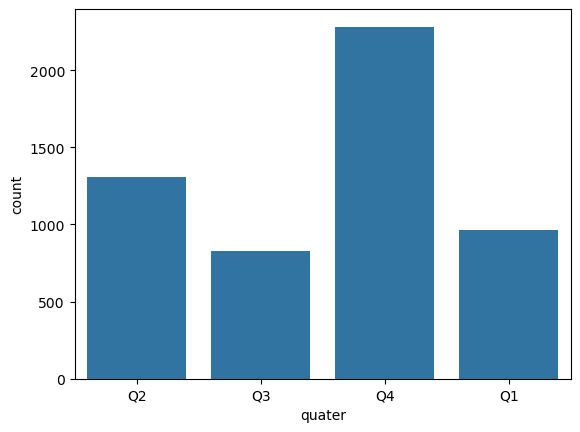

In [261]:
sns.countplot(data=df,x='quater')

In [262]:
df.groupby('quater')['price'].mean().round(2).sort_values().reset_index()

,quater,price
0,Q1,3125849.13
1,Q2,3280552.66
2,Q3,3526006.14
3,Q4,4054611.17


means at the starting of the year the price is relatively less . and it becomes expensive as you go towards the Q4 of the year 

# City and Project Level 


In [263]:
#Which projects have the highest average price per sqft? Which are emerging as affordable luxury?
project_prices = df.groupby('project_name')['price_per_sqft'].mean().reset_index()

most_expensive_projects = project_prices.sort_values(by='price_per_sqft', ascending=False)

print(most_expensive_projects.head(10))

                                  project_name  price_per_sqft
160       Burj Binghatti Jacob & Co Residences    14838.053247
159                                 Burj Azizi     9388.783657
74                     Armani Beach Residences     6312.822624
443  Marbella Resort Hotel Vignette Collection     6063.507853
474                       Mercedes-Benz Places     5991.285403
157            Bugatti Residences by Binghatti     5911.259122
401                    Kempinski The Boulevard     5861.165190
391               Jumeirah Living Business Bay     5508.582639
199                            Como Residences     5400.719205
508                                Ocean House     5359.797769


In [264]:
overall_avg_price_per_sqft = df['price_per_sqft'].mean()

In [265]:
affordable_luxury = project_prices[
    (project_prices['price_per_sqft'] > overall_avg_price_per_sqft) &
    (project_prices['price_per_sqft'] < most_expensive_projects['price_per_sqft'].quantile(0.90))
].sort_values(by='price_per_sqft', ascending=False)

print(affordable_luxury.head(10)) 

                                          project_name  price_per_sqft
162                                       Burj Khalifa     3055.303232
170                                      Canal Heights     3047.166096
763                                      The Meadows 3     3045.836960
624                                          Safa Gate     3041.232357
233  DAMAC Paramount Tower (Midtown) Hotel And Resi...     3036.780342
772                                       The Pinnacle     3019.321256
4                                           25H Heimat     2997.448889
544                       Palace Residences Creek Blue     2964.959569
176                                      Cavalli Tower     2961.798383
247                                  District One West     2957.232596


these property are expensive enough to be premium but still affordable compared to top most properties .

In [266]:
#Which areas offer the most furnished properties, and how does furnishing impact price?
furnished_count = df[df['furnishing'] == 'Furnished'].groupby('address').size().reset_index(name='furnished_count')
furnished_count = furnished_count.sort_values(by='furnished_count', ascending=False).head(10)
print(furnished_count)

                           address  furnished_count
11                    Business Bay              306
47   Jumeirah Village Circle (JVC)              172
19                  Downtown Dubai               89
27                    Dubai Marina               79
72                   Palm Jumeirah               79
34               Dubai Sports City               62
50                           Majan               52
7                            Arjan               50
30    Dubai Production City (IMPZ)               34
2                        Al Furjan               34


<Axes: >

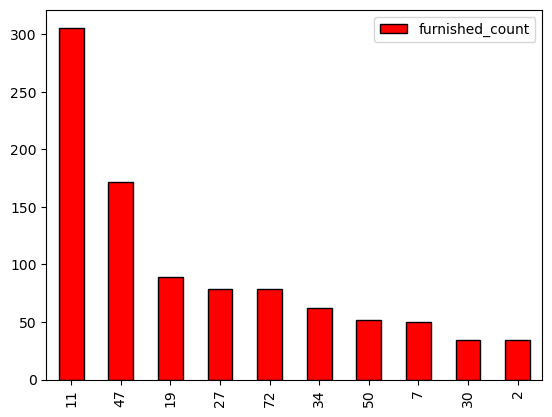

In [267]:
furnished_count.plot(kind='bar',color='red',edgecolor='black')

In [268]:
furnishing_price = df.groupby('furnishing')['price_per_sqft'].mean().reset_index()

print(furnishing_price)

    furnishing  price_per_sqft
0    Furnished     2208.195587
1  Unfurnished     1918.012657


furnished type price per sqft is more as you can see from the unfurnished one .

In [269]:
#Are there any cities where specific property types dominate.
property_distribution = df.groupby(['address', 'propert_type']).size().reset_index(name='property_count')

print(property_distribution.sort_values(by='property_count', ascending=False).head(20))

                            address propert_type  property_count
26                     Business Bay    Apartment             580
101   Jumeirah Village Circle (JVC)    Apartment             550
61                     Dubai Marina    Apartment             206
42                   Downtown Dubai    Apartment             206
18                            Arjan    Apartment             149
72                Dubai Sports City    Apartment             147
23                          Bukadra    Apartment             123
60     Dubai Land Residence Complex    Apartment             122
66     Dubai Production City (IMPZ)    Apartment             121
180                   Palm Jumeirah    Apartment             104
50               Dubai Hills Estate    Apartment              99
44              Dubai Creek Harbour    Apartment              96
4                         Al Furjan    Apartment              90
137                  Sobha Hartland    Apartment              90
111                      

most of them are apartments that , Business bay has the most number of apartments .

# Supply and Demand Signals

In [270]:
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name,price_per_sqft,quater,year
0,1800000.0,3 beds,4 baths,1208.0,UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas,1490.066225,Q2,2025
1,325000.0,Studio,1 bath,483.0,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas,672.877847,Q2,2025
2,470000.0,Studio,1 bath,428.0,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas,1098.130841,Q2,2025
3,1120000.0,1 bed,1 bath,706.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1586.402266,Q3,2029
4,2127888.0,2 beds,2 baths,1149.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1851.947781,Q3,2029


In [271]:
#What is the proportion of studio, 1BHK, 2BHK, 3BHK, and larger properties currently listed?
df['bedroom'].value_counts().sort_values(ascending=False)

bedroom
1 bed      1811
2 beds     1397
Studio      769
3 beds      657
4 beds      441
5 beds      211
6 beds       76
7 beds       10
10 beds       4
9 beds        3
8 beds        1
Name: count, dtype: int64

1 bhk properties are more then follows 2bhk then studio appartment 

In [272]:
#Is there a price premium for specific bedroom or bathroom combinations (example: 3-bed 4-bath vs. 3-bed 3-bath)?
df['bedroom_count'] = df['bedroom'].str.extract(r'(\d+)').astype(float)
df['bathroom_count'] = df['bathroom'].str.extract(r'(\d+)').astype(float)

In [273]:
combo_prices = df.groupby(['bedroom_count', 'bathroom_count'])['price_per_sqft'].mean().reset_index()

combo_prices = combo_prices.sort_values(by='price_per_sqft', ascending=False)

print(combo_prices)

    bedroom_count  bathroom_count  price_per_sqft
11            3.0            13.0     7525.594633
30            7.0             9.0     5828.256556
32            8.0            10.0     4671.012123
28            7.0             7.0     3033.980583
17            5.0             4.0     3002.472484
26            6.0             9.0     2857.993953
21            5.0             8.0     2692.928536
25            6.0             8.0     2641.433440
23            6.0             6.0     2583.661399
14            4.0             5.0     2474.238995
27            6.0            10.0     2471.668621
3             2.0             1.0     2285.430745
0             1.0             1.0     2062.494863
20            5.0             7.0     2050.363306
9             3.0             4.0     2025.515502
18            5.0             5.0     2012.898404
7             3.0             2.0     2012.514716
6             2.0             4.0     2004.073154
5             2.0             3.0     2002.453599


In [274]:
#How does completion status (Off-plan vs. Ready) correlate with property size and price per sqft?


In [275]:
completion_analysis = df.groupby('completion_status').agg({
    'area(sqft)': 'mean',
    'price_per_sqft': 'mean',
    'price': 'count'
}).reset_index().rename(columns={'price': 'property_count'})

print(completion_analysis)

  completion_status   area(sqft)  price_per_sqft  property_count
0          Off-Plan  6620.309687     2050.301636            2622
1             Ready  1706.026106     1956.277154            2758


# Investment Opportunity Exploration


In [276]:
#Identify undervalued areas where price per sqft is significantly lower than city averages.
city_avg = df.groupby('city')['price_per_sqft'].mean().reset_index().rename(columns={'price_per_sqft': 'city_avg_price_per_sqft'})

In [277]:
df = df.merge(city_avg, on='city', how='left')

In [278]:
df['price_diff'] = df['price_per_sqft'] - df['city_avg_price_per_sqft']

In [279]:
undervalued_areas = df.groupby('address')['price_diff'].mean().reset_index()

undervalued_areas = undervalued_areas[undervalued_areas['price_diff'] < 0].sort_values(by='price_diff')

print(undervalued_areas.head(10)) 

                             address   price_diff
74                      Nad Al Hamar -1287.815268
54                International City -1137.063474
114                          Remraam -1124.251178
5                            Al Quoz -1067.772686
26                 Discovery Gardens -1030.940539
35       Dubai Investment Park (DIP) -1012.126740
25                             Deira -1002.100982
33             Dubai Industrial City  -971.598096
111                            Majan  -924.429637
22    DAMAC Hills 2 (Akoya by DAMAC)  -904.304431


In [280]:
df.head()

,price,bedroom,bathroom,area(sqft),country,city,address,propert_type,purpose,furnishing,completion_status,handover,project_name,price_per_sqft,quater,year,bedroom_count,bathroom_count,city_avg_price_per_sqft,price_diff
0,1800000.0,3 beds,4 baths,1208.0,UAE,Dubai,DAMAC Hills 2 (Akoya by DAMAC),Townhouse,Sale,Unfurnished,Off-Plan,Q2 2025,Camelia Villas,1490.066225,Q2,2025,3.0,4.0,2002.100982,-512.034757
1,325000.0,Studio,1 bath,483.0,UAE,Dubai,International City,Apartment,Sale,Unfurnished,Ready,Q2 2025,Camelia Villas,672.877847,Q2,2025,NaN,1.0,2002.100982,-1329.223135
2,470000.0,Studio,1 bath,428.0,UAE,Dubai,Arjan,Apartment,Sale,Furnished,Ready,Q2 2025,Camelia Villas,1098.130841,Q2,2025,NaN,1.0,2002.100982,-903.970141
3,1120000.0,1 bed,1 bath,706.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1586.402266,Q3,2029,1.0,1.0,2002.100982,-415.698716
4,2127888.0,2 beds,2 baths,1149.0,UAE,Dubai,Dubai South,Apartment,Sale,Unfurnished,Off-Plan,Q3 2029,Camelia Villas,1851.947781,Q3,2029,2.0,2.0,2002.100982,-150.153201


these area is cheaper than the average price of that city.these are the potential areas where someone can invest !

# Customer Insights

In [287]:
#Which projects or areas offer the highest value for money (price per sqft vs. amenities or furnishing)?
furnished_df = df[df['furnishing'] == 'Furnished']

In [288]:
furnished_projects = furnished_df.groupby('project_name')['price_per_sqft'].mean().reset_index()

# Sort to find lower priced ones
value_projects = furnished_projects.sort_values(by='price_per_sqft').head(10)

print(value_projects)

                    project_name  price_per_sqft
213  Madison Residences Columbus      638.207946
412          Verdana Residence 2      774.154421
117                   Desert Sun      785.714286
27                      Amazonia      797.325103
200             Lamaa Building 1      818.181818
275                     Palmiera      824.622532
336        Silver Park Residency      833.847437
409                       Venice      855.578371
68           Binghatti Hillviews      886.627907
28                          Anwa      886.627907


these projects are furnished but have low price per sqft best value for money.

In [290]:
#Which bedroom configurations are most common in off-plan projects compared to ready projects?


In [291]:
bedroom_distribution = df.groupby(['completion_status', 'bedroom_count']).size().reset_index(name='property_count')

bedroom_distribution = bedroom_distribution.sort_values(by=['completion_status', 'property_count'], ascending=[True, False])

print(bedroom_distribution)

   completion_status  bedroom_count  property_count
0           Off-Plan            1.0             923
1           Off-Plan            2.0             708
2           Off-Plan            3.0             261
3           Off-Plan            4.0             214
4           Off-Plan            5.0             129
5           Off-Plan            6.0              42
6           Off-Plan            7.0               1
7              Ready            1.0             888
8              Ready            2.0             689
9              Ready            3.0             396
10             Ready            4.0             227
11             Ready            5.0              82
12             Ready            6.0              34
13             Ready            7.0               9
16             Ready           10.0               4
15             Ready            9.0               3
14             Ready            8.0               1


# TOP 3 ANALYSIS FROM THIS PROJECT 

-->Several areas like Nad Al Hamar, International City, and Remraam show a significantly lower price per sqft compared to their city averages .

These areas are undervalued and may represent strong upside potential for investors looking for affordable entry points with room for appreciation.   [279]

--> Completion Status Strongly Influences Price per Sqft
Ready properties generally have a lower price per sqft than Off-Plan ones.

Off-Plan projects often position themselves as "luxury future-ready", hence priced higher, even though they’re not delivered yet.  [275]

--> Most Off-Plan projects offer 1-2 bedroom units, targeting affordable investors and young professionals.

However, Off-Plan properties with sooner handovers (e.g., Q3/Q4 2024) are already priced higher per sqft than those with longer timelines, showing that buyers are willing to pay a premium for quicker possession.